# Bagging and Random Forests
> A Summary of lecture "Machine Learning with Tree-Based Models in Python
", via datacamp

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Machine_Learning]
- image: images/feature_importances.png

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Bagging
- Ensemble Methods
    - Voting Classifier
        - same training set,
        - $\neq$ algortihms
    - Bagging
        - One algorithm
        - $\neq$ subsets of the training set
- Bagging
    - Bootstrap Aggregation
    - Uses a technique known as the bootstrap
    - Reduces variance of individual models in the ensemble
_ Bootstrap
![bootstrap](image/bootstrap.png)
- Bootstrap-training
![training](image/bs_training.png)
- Bootstrap-predict
![predict](image/bs_predict.png)

### Define the bagging classifier
In the following exercises you'll work with the [Indian Liver Patient dataset](https://www.kaggle.com/uciml/indian-liver-patient-records) from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.



- Preprocess

In [2]:
indian = pd.read_csv('./dataset/indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [3]:
X = indian.drop('Liver_disease', axis='columns')
y = indian['Liver_disease']

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

### Evaluate Bagging performance
Now that you instantiated the bagging classifier, it's time to train it and evaluate its test set accuracy.



In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [6]:
from sklearn.metrics import accuracy_score

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.71


In [7]:
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))

Test set accuracy of dt: 0.63


## Out of Bag Evaluation
- Bagging
    - Some instances may be sampled several times for one model, other instances may not be sampled at all.
- Out Of Bag (OOB) instances
    - On average, for each model, 63% of the training instances are sampled
    - The remaining 37% constitute the OOB instances
- OOB Evaluation
![oob](image/oob.png)
    

### Prepare the ground
In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter ```oob_score``` to ```True``` during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the ```.oob_score_``` attribute from the corresponding instance.



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, oob_score=True, random_state=1)

### OOB Score vs Test Set Score
Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.



In [9]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.700


## Random Forests (RF)
- Bagging
    - Base estimator: Decision Tree, Logistic Regression, Neural Network, ...
    - Each estimator is trained on a distinct bootstrap sample of the training set
    - Estimators use all features for training and prediction
- Further Diversity with Random Forest
    - Base estimator: Decision Tree
    - Each estimator is trained on a different bootstrap sample having the same size as the training set
    - RF introduces further randomization in the training of individual trees
    - $d$ features are sampled at each node without replacement
    $$ d < \text{total number of features} $$
- Random Forest: Training
![rf_training](image/rf_training.png)
- Random Forest: Prediction
![rf_predict](image/rf_prediction.png)
- Feature importance
    - Tree based methods: enable measuring the importance of each feature in prediction
    

### Train an RF regressor
In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

- Preprocess

In [10]:
bike = pd.read_csv('./dataset/bikes.csv')
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [11]:
X = bike.drop('cnt', axis='columns')
y = bike['cnt']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

### Evaluate the RF regressor
You'll now evaluate the test set RMSE of the random forests regressor ```rf``` that you trained in the previous exercise.

In [14]:
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** 0.5

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


### Visualizing features importances
In this exercise, you'll determine which features were the most predictive according to the random forests regressor ```rf``` that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by ```rf```. Fortunately, this can be done easily thanks to plotting capabilities of ```pandas```.

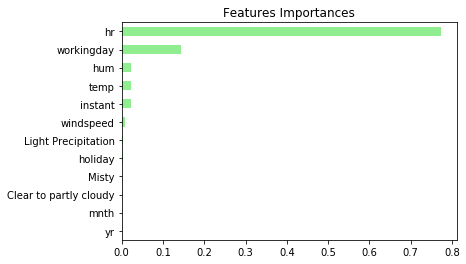

In [15]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('../images/feature_importances.png')

Apparently, ```hr``` and ```workingday``` are the most important features according to ```rf```. The importances of these two features add up to more than 90%!